<a href="https://colab.research.google.com/github/devak23/python/blob/master/ml2/01_neural_network_regression_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with NeuralNetwork using TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical value based on the compbination of some input variables, even shorter ... predicting a number.

In [1]:
import tensorflow as tf
print (tf.__version__)

2.15.0


## Create some data to view and fit

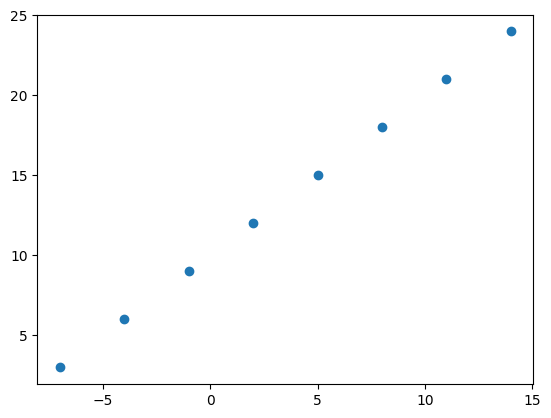

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10 # this is the relationship that we want our neural network to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0] # We are going to use 1 X value to predict 1 y value

(-7.0, 3.0)

In [11]:
# Turn our numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

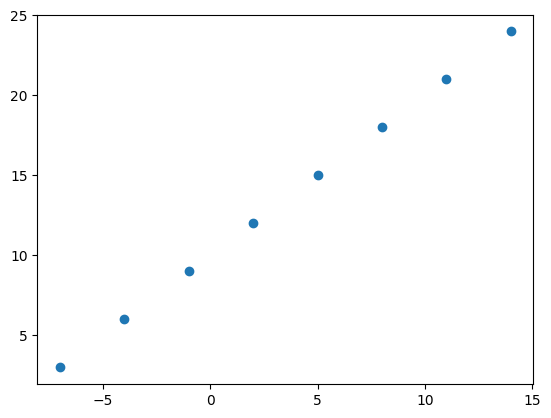

In [13]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

1. **Creating the model** - define input and output layers as well as the hidden layers of a deep learning model
2. **Compiling the model** - define a loss function (in other words, the function which tells our model how wrong it is) and the optimizer  (tells our model how to improve the pattern its learning) and evaulation metrics (What we can use to intepret the performance of our model)
3. **Fitting the model** - letting our model try to find patterns between X and y (features and labels)

In [14]:
tf.reshape(X, shape=(-1,1))

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD = stochastic gradient descent
              metrics=["mae"]
)

# 3. Fitting the model
# model.fit(X, y, epochs=5) # this doesn't work!

model.fit(tf.reshape(X, shape=(-1,1)),y, epochs=5) # If we change the epochs to 32 (by experimentation) we can predict the y given X with a good accuracy.

#model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # This does the same thing.

Epoch 1/5
1/1 [==============================] - 0s 401ms/step - loss: 16.6858 - mae: 16.6858
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 16.4046 - mae: 16.4046
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 16.1233 - mae: 16.1233
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 15.8421 - mae: 15.8421
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 15.5608 - mae: 15.5608


In [16]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 80ms/step


array([[-8.244552]], dtype=float32)

In [18]:
y_pred + 10 # as you can see that due to the loss function (error), our y value is off. If we add 10 (error) to our prediction is still bad as we expect 27 and we are getting 12

array([[1.7554483]], dtype=float32)

## Improving our model

We can improve our model by the steps we took to create our model

1. **Creating a model:** We might add layers, increase the number of hidden units (called as neurons) within each of the hidden layers, change the activation function of each layer

2. **Compiling a model:** We can change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model:** Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from


In [19]:
# Lets rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model (this time we will train for longer)
model.fit(tf.reshape(X, shape=(-1,1)), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 270ms/step - loss: 13.6711 - mae: 13.6711
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.5386 - mae: 13.5386
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4061 - mae: 13.4061
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2736 - mae: 13.2736
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1411 - mae: 13.1411
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 13.0086 - mae: 13.0086
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8761 - mae: 12.8761
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7436 - mae: 12.7436
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6111 - mae: 12.6111
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4786 - mae: 12.4786
Epoch 11/100
1/1 [==============================] - 0s

In [20]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 54ms/step


array([[29.793879]], dtype=float32)

In [21]:
# Lets try to add more nodes this time
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), # The most important hyper-parameter of many different neural network
              metrics = ["mae"])

model.fit(tf.reshape(X, shape=(-1, 1)), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 892ms/step - loss: 13.6639 - mae: 13.6639
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 10.9434 - mae: 10.9434
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0914 - mae: 8.0914
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 4.1666 - mae: 4.1666
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2880 - mae: 7.2880
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 6.6645 - mae: 6.6645
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 4.8989 - mae: 4.8989
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 3.8033 - mae: 3.8033
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 4.8336 - mae: 4.8336
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 5.2186 - mae: 5.2186
Epoch 11/100
1/1 [==============================] - 0s 10ms/step -

In [22]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 72ms/step


array([[28.81163]], dtype=float32)

## Common ways to improve deep model:

1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate of the optimizer
6. Fitting on more data
7. Fitting for longer

## Evaluating a model

In practise a typical workflow you will go through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it again -> fit it again -> evaluate it again ...
```

So so far we have done all of that **including evaluation** too by the way of predicting a value and checking with our expected results.

When it comes to evaluation, there are 3 words you should memorize: (When you are building model, you should experiment experiment and experiment)

> "Visualize", "Visualize", "Visualize"

Its a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model - what does our model look like?
* The training - how does our model perform while it learns?
* The predictions - How do the predictions of a model line up against the ground truth (the original labels)


In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

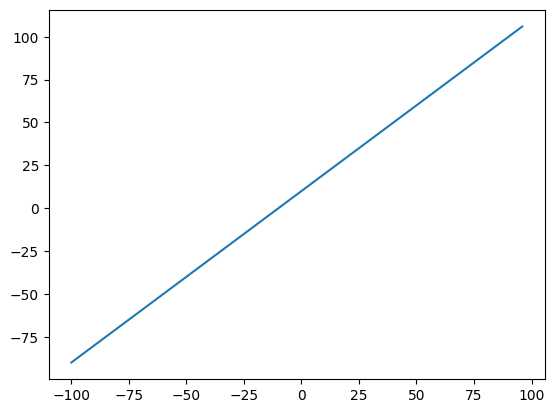

In [25]:
# lets visualize the data
import matplotlib.pyplot as plt

plt.plot(X, y)

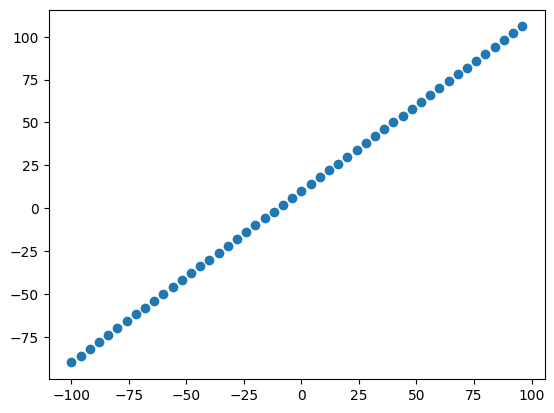

In [26]:
# A better plot is always scatter in such cases
plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data which is typically 70-80% data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% data you have available
* **Test set** - the model gets evaluated on this data, which is typically 10-15% of the total data available

What are we going for in here with all the 3 datasets and model training?

**Generalization** - The ability for a machine learning model to perform well on the data it hasn't seen before


In [27]:
# Check the length of the samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing sampels (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that we have got our training and test data sets... lets visualize it again!

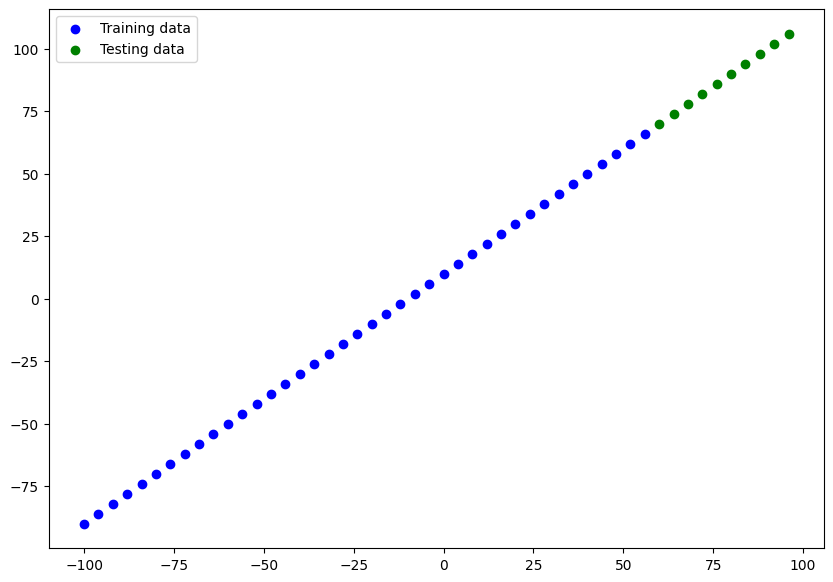

In [29]:
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()


In [30]:
# Build the model with the training data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

model.fit(tf.reshape(X_train, shape=(-1,1)), y_train, epochs=100, verbose=0)


In [31]:
# Now lets use the testing data to see if our model has learnt the relation
model.predict(X_test), y_test

1/1 [==============================] - 0s 52ms/step


(array([[ 68.109314],
        [ 72.010056],
        [ 75.9108  ],
        [ 79.81154 ],
        [ 83.71228 ],
        [ 87.61302 ],
        [ 91.513756],
        [ 95.41449 ],
        [ 99.31523 ],
        [103.21597 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

## We can also visualize the model

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                100       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2701 (10.55 KB)
Trainable params: 2701 (10.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Lets create a model which builds automatically bu defining the input_shape argument
tf.random.set_seed(42)

# Create a model
new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# compile the model
new_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model. These are the patterns that our model is going to learn. In our case, we are trying to learn the pattern between X and y.
* Trainable params - these are parameters (patterns) the model can update as it trains
* Non-traininable params - these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer learning**)

📚 **Resource:** For more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video

🏋 **Exercise:** Try playing around with number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

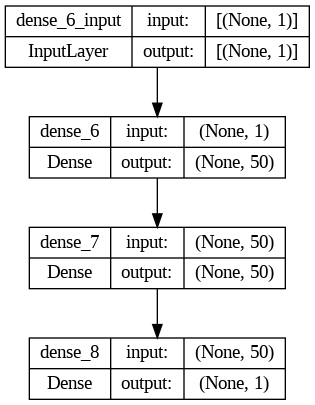

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

 ### Visualizing our model's prediction

 To visualize predictions, its a good idea to plot them against the ground truth labels

 Often you will see this in the form of `y_test` or `y_true` versus `y_pred` (ground truths Vs your model)

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 32ms/step


array([[ 68.109314],
       [ 72.010056],
       [ 75.9108  ],
       [ 79.81154 ],
       [ 83.71228 ],
       [ 87.61302 ],
       [ 91.513756],
       [ 95.41449 ],
       [ 99.31523 ],
       [103.21597 ]], dtype=float32)

🔑 **NOTE:** If you feel like you're going to reuse some kind of functionality in the future, its a good idea to turn it into a function.

In [36]:
# Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares the predictions to the ground truth labels
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # show the legend
  plt.legend()


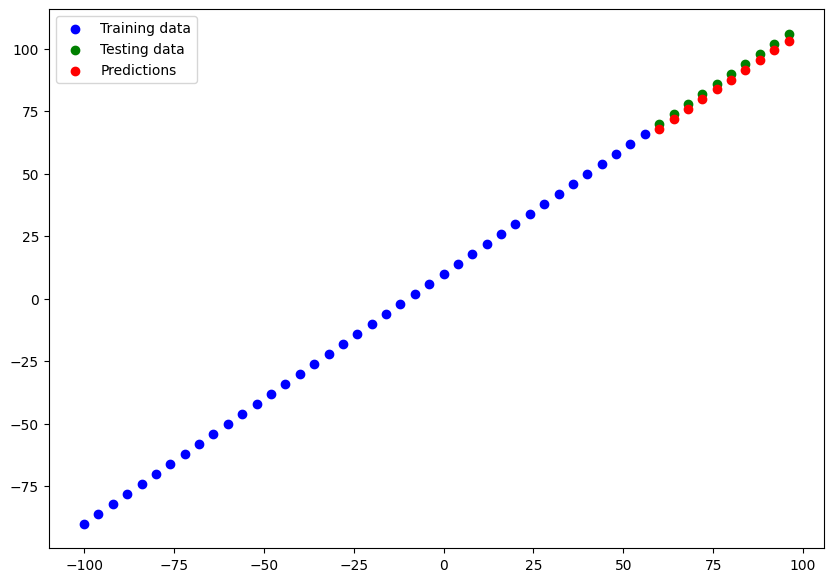

In [37]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaulating our model's prediction with regression evaluation metrics

Depending on the problem you are working on there will be a different evaulation metrics to evaluate your model's performance.

Since we are working on the regression, two of the main metrics are:
* MAE - mean absolute error; "on average how wrong is each of my model's predictions"
* MSE - mean squared error; "Square the average errors"

In [38]:
# Evaluate the model on the test set
model.evaluate (X_test, y_test)

1/1 [==============================] - 0s 147ms/step - loss: 2.3374 - mae: 2.3374


[2.337355136871338, 2.337355136871338]

In [49]:
y_pred, y_test, tf.squeeze(y_pred)

(array([[ 68.109314],
        [ 72.010056],
        [ 75.9108  ],
        [ 79.81154 ],
        [ 83.71228 ],
        [ 87.61302 ],
        [ 91.513756],
        [ 95.41449 ],
        [ 99.31523 ],
        [103.21597 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 68.109314,  72.010056,  75.9108  ,  79.81154 ,  83.71228 ,
         87.61302 ,  91.513756,  95.41449 ,  99.31523 , 103.21597 ],
       dtype=float32)>)

In [50]:
# Calculate the absolute mean error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.3373542>

In [53]:
# Calcuate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.5445094>

In [74]:
# Make some functions to reuse MAE and MSE
def errors(y_true, y_pred):
  return (tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy(),
  tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy())

### Running experiments to improve our model

```
Build model -> fit it ->  evaluate it -> tweak it -> fit it-> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data -get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data.

Lets do 3 modelling experiments:

1. `model_1` - same as original model: 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4.
5.

**Build `model_1`**

In [64]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.reshape(X_train, shape=(-1,1)), y_train, epochs=100, verbose=False)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


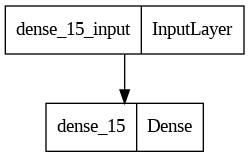

In [66]:
model_1.summary()
plot_model(model_1)

1/1 [==============================] - 0s 48ms/step


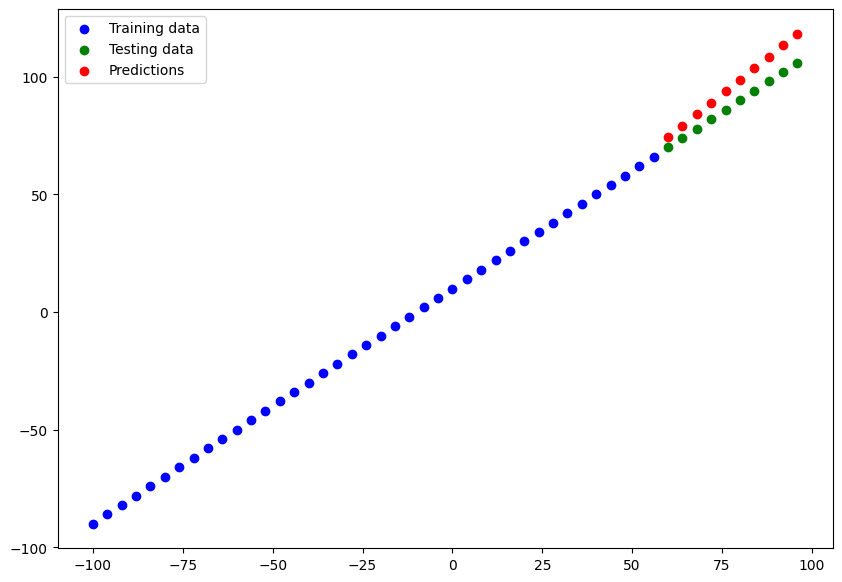

In [67]:
# Make and plot predictions for model_1
y_pred1 = model_1.predict(X_test)

# Plot the predictions
plot_predictions(predictions=y_pred1)

In [75]:
# Calculate mode_1 evaluation metrics
mae_1, mse_1 = errors(y_test, y_pred1)
mae_1, mse_1

(8.335467, 75.78983)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [77]:
# 1. Create the model with 2 dense layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_2.fit(tf.reshape(X_train, shape=(-1,1)), y_train, epochs=100, verbose=False)


In [78]:
# 4. Summarize and Visualize the model
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


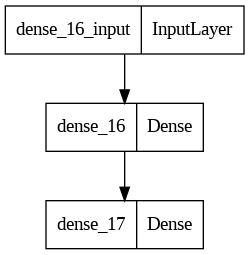

In [79]:
# Visualize the model
plot_model(model_2)

In [81]:
# 5. Make predictions using the model
y_pred2 = model_2.predict(X_test)

1/1 [==============================] - 0s 19ms/step


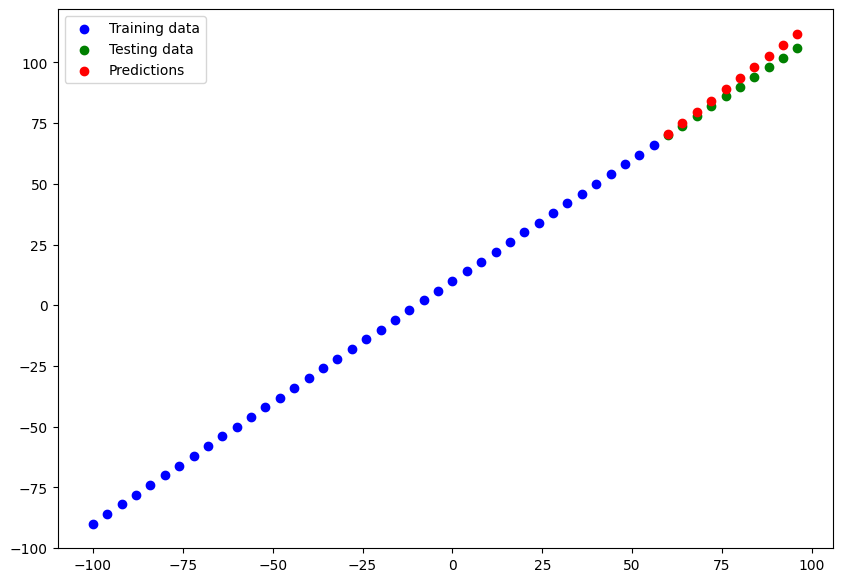

In [82]:
# 6. Plot the predictions
plot_predictions(predictions=y_pred2)

In [83]:
# 6. Calculate the mean squared error and mean errors of the model
mae_2, mse_2 = errors(y_test, y_pred)
mae_2, mse_2

(2.3373542, 5.5445094)